In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Datathon/

 2019_vtrans_prioritized_mid-term_needs_0.csv
 2019_VTrans_Prioritized_Mid-term_Needs.csv
 CrashUID_Matches_Vehicle.csv
 Final-Virtual-Kickoff-Deck.pdf
 Government_Transportation_Financial_Statistics__GTFS__Data.csv
'GTFS Stops - Dec 2024.csv'
 transit_data_october_2021_-4168999320477471535.xlsx
'Transportation Safety_Fatalities_VA 2010 - 2023.csv'
 transportation-safety_fatalities_va-2010-2023.xlsx
'VDOT 6 Year Improvement Plan - Project list.csv'
 vdot-6-year-improvement-plan-project-list.xlsx
'Vehicle Data - Virginia Department of Motor Vehicles.csv'
'vehicles-involved-in-fatal-crashes_1994-_2022_virginia 222.xlsx'


In [ ]:
import pandas as pd

# Load GTFS data
file_path = "/content/drive/MyDrive/Datathon/Government_Transportation_Financial_Statistics__GTFS__Data.csv"
df = pd.read_csv(file_path)

# Filter for key modes only
modes_of_interest = ["Highway", "Transit", "Railroads", "Water"]
gtfs_filtered = df[df["Mode"].isin(modes_of_interest)]

# Keep only necessary columns
gtfs_filtered = gtfs_filtered[["Mode", "Year", "Chained 2012 Dollars"]]
gtfs_filtered = gtfs_filtered.rename(columns={"Chained 2012 Dollars": "Expenditure"})

# Standardize mode names
gtfs_filtered["Mode"] = gtfs_filtered["Mode"].str.title().str.strip()


In [ ]:
# Total expenditure by mode (all years)
total_by_mode = gtfs_filtered.groupby("Mode")["Expenditure"].sum().sort_values(ascending=False)
print("Total Expenditure by Mode (All Years):")
print(total_by_mode)


Total Expenditure by Mode (All Years):
Mode
Highway      1.326757e+10
Transit      3.558718e+09
Water        1.022602e+09
Railroads    1.426586e+08
Name: Expenditure, dtype: float64


In [ ]:
# Calculate total yearly expenditure
yearly_total = gtfs_filtered.groupby("Year")["Expenditure"].sum().reset_index()
yearly_total = yearly_total.rename(columns={"Expenditure": "Total_Expenditure"})

# Merge back to original to calculate % share
gtfs_percent = gtfs_filtered.merge(yearly_total, on="Year")
gtfs_percent["Percent_Share"] = (gtfs_percent["Expenditure"] / gtfs_percent["Total_Expenditure"]) * 100


In [ ]:
# First, aggregate by Year and Mode
agg_percent = gtfs_percent.groupby(["Year", "Mode"])["Percent_Share"].sum().reset_index()

# Now pivot safely
share_pivot = agg_percent.pivot(index="Year", columns="Mode", values="Percent_Share")
share_pivot.head()


Mode,Highway,Railroads,Transit,Water
Year,,,,
2007,75.334160,0.539487,18.683143,5.443210
2008,74.450411,0.525603,19.427767,5.596220
2009,73.371483,0.628083,20.031532,5.968903
2010,74.483430,0.861627,19.000321,5.654623
2011,74.068232,0.793132,19.055397,6.083240


<ipython-input-11-7dff41873f16>:13: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


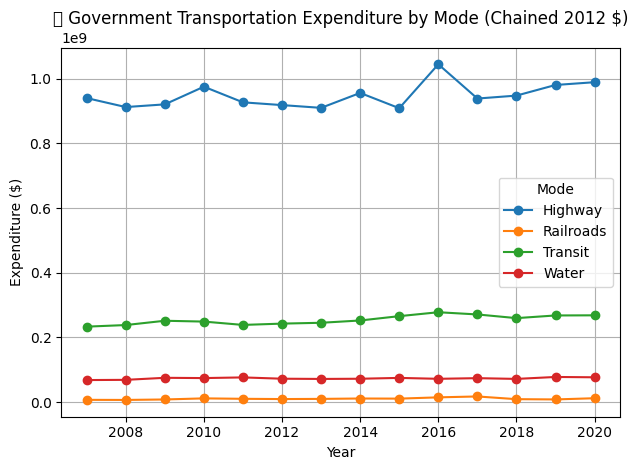

In [ ]:
# Pivot actual expenditure (not % share)
expenditure_trend = gtfs_filtered.groupby(["Year", "Mode"])["Expenditure"].sum().reset_index()
expenditure_pivot = expenditure_trend.pivot(index="Year", columns="Mode", values="Expenditure")

# Plot actual spending per mode
plt.figure(figsize=(12, 6))
expenditure_pivot.plot(marker='o')
plt.title("💵 Government Transportation Expenditure by Mode (Chained 2012 $)")
plt.xlabel("Year")
plt.ylabel("Expenditure ($)")
plt.grid(True)
plt.legend(title="Mode")
plt.tight_layout()
plt.show()


In [ ]:
# Get top 5 years by spend per mode
top_years = expenditure_trend.sort_values(by="Expenditure", ascending=False).groupby("Mode").head(5)

print("📊 Top 5 Highest Spending Years by Mode:")
print(top_years.sort_values(by=["Mode", "Expenditure"], ascending=[True, False]))


📊 Top 5 Highest Spending Years by Mode:
    Year       Mode   Expenditure    Cumulative
36  2016    Highway  1.044494e+09  9.411804e+09
52  2020    Highway  9.890827e+08  1.326757e+10
48  2019    Highway  9.804947e+08  1.227849e+10
12  2010    Highway  9.751752e+08  3.747881e+09
28  2014    Highway  9.559037e+08  7.458631e+09
41  2017  Railroads  1.720882e+07  1.141112e+08
37  2016  Railroads  1.443687e+07  9.690238e+07
53  2020  Railroads  1.174052e+07  1.426586e+08
13  2010  Railroads  1.128086e+07  3.233220e+07
29  2014  Railroads  1.085879e+07  7.196728e+07
38  2016    Transit  2.776679e+08  2.492597e+09
42  2017    Transit  2.708285e+08  2.763425e+09
54  2020    Transit  2.681366e+08  3.558718e+09
50  2019    Transit  2.676998e+08  3.290581e+09
34  2015    Transit  2.655415e+08  2.214929e+09
51  2019      Water  7.748474e+07  9.461216e+08
55  2020      Water  7.648067e+07  1.022602e+09
19  2011      Water  7.611968e+07  3.615242e+08
11  2009      Water  7.488557e+07  2.113713e+08


In [ ]:
# Efficiency Score = Mode's % share of total spending divided by its standard deviation across years
efficiency = gtfs_percent.groupby("Mode")["Percent_Share"].agg(["mean", "std"])
efficiency["Efficiency_Score"] = efficiency["mean"] / efficiency["std"]
efficiency = efficiency.sort_values(by="Efficiency_Score", ascending=False)
print("🚀 Efficiency Score by Mode (Higher = More Stable & Proportionally Funded):")
print(efficiency)


🚀 Efficiency Score by Mode (Higher = More Stable & Proportionally Funded):
               mean       std  Efficiency_Score
Mode                                           
Water      0.568890  0.348745          1.631251
Railroads  0.131541  0.102277          1.286130
Transit    1.977629  1.786343          1.107082
Highway    6.704142  6.294037          1.065158


<ipython-input-21-af188482b425>:28: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


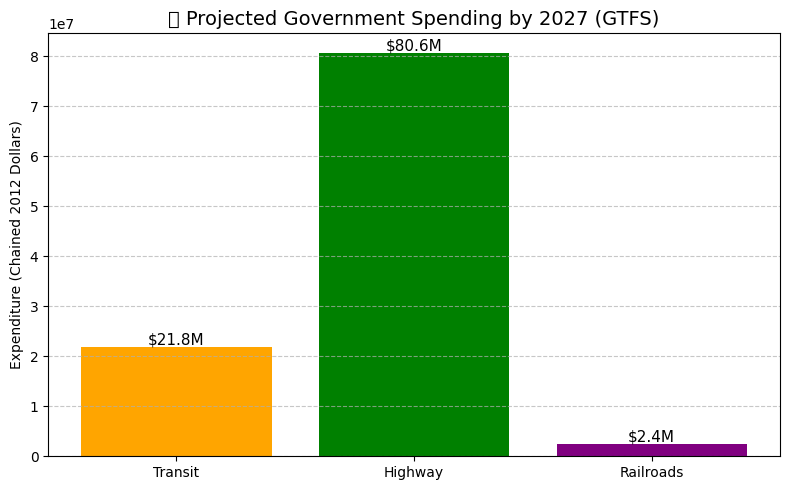

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Pull forecasted values for 2027
future_2027 = {}

for mode in selected_modes:
    fut = predicted_data[mode]
    forecast_2027 = fut[fut['ds'].dt.year == 2027]
    if not forecast_2027.empty:
        future_2027[mode] = forecast_2027['yhat'].values[0]

# Step 2: Turn into DataFrame for easy plotting
future_df = pd.DataFrame(list(future_2027.items()), columns=['Mode', 'Projected_2027_Expenditure'])

# Step 3: Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(future_df['Mode'], future_df['Projected_2027_Expenditure'], color=['orange', 'green', 'purple'])

# Add labels on bars (in millions)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"${yval/1e6:.1f}M", ha='center', va='bottom', fontsize=11)

plt.title("🚧 Projected Government Spending by 2027 (GTFS)", fontsize=14)
plt.ylabel("Expenditure (Chained 2012 Dollars)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-26-844186390016>:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


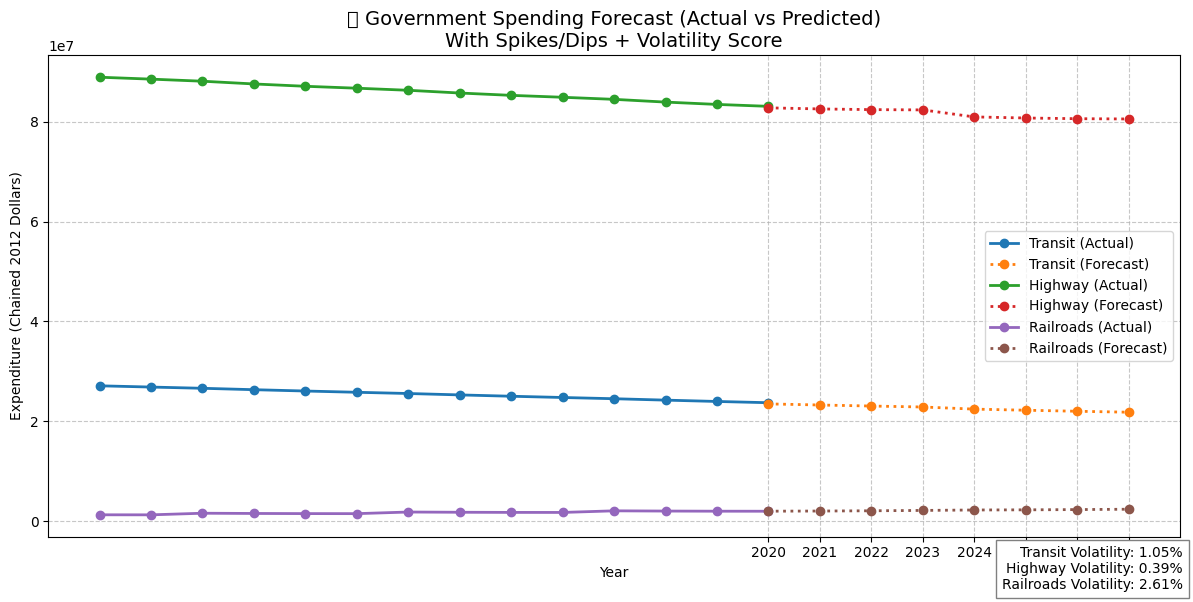

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
threshold = 0.05  # 5% threshold for spike/dip
volatility_scores = {}

for mode in selected_modes:
    hist = historical_data[mode][['ds', 'yhat']].copy()
    fut = predicted_data[mode][['ds', 'yhat']].copy()

    # Combine for annotation
    combined = pd.concat([hist, fut])
    combined['Year'] = combined['ds'].dt.year
    combined['Change'] = combined['yhat'].pct_change()

    # Plot actual (solid + dots)
    plt.plot(hist['ds'].dt.year, hist['yhat'], label=f"{mode} (Actual)", linewidth=2, marker='o')

    # Plot forecast (dotted + dots)
    plt.plot(fut['ds'].dt.year, fut['yhat'], linestyle='dotted', linewidth=2, marker='o', label=f"{mode} (Forecast)")

    # Annotate spikes/dips
    for i in range(1, len(combined)):
        change = combined.iloc[i]['Change']
        year = combined.iloc[i]['Year']
        value = combined.iloc[i]['yhat']

        if abs(change) > threshold and combined.iloc[i]['ds'].year >= 2021:
            label = "Spike" if change > 0 else "Dip"
            color = 'green' if label == "Spike" else 'red'
            plt.scatter(year, value, color=color, zorder=5)
            plt.text(year, value * 1.02, f"{label} ({year})", ha='center', fontsize=9)

    # Volatility score calculation
    fut['pct_change'] = fut['yhat'].pct_change()
    volatility_score = fut['pct_change'].abs().mean() * 100
    volatility_scores[mode] = volatility_score

# 🎯 Format X-axis to show full years only
plt.xticks(ticks=range(2020, 2028), labels=[str(y) for y in range(2020, 2028)])

# 📝 Title and labels
plt.title("📈 Government Spending Forecast (Actual vs Predicted)\nWith Spikes/Dips + Volatility Score", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Expenditure (Chained 2012 Dollars)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 🧮 Show volatility scores in corner
score_text = "\n".join([f"{mode} Volatility: {volatility_scores[mode]:.2f}%" for mode in selected_modes])
plt.figtext(0.99, 0.01, score_text, horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()
